# 男性芸能人

In [8]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
# まず、PDFファイルの各ページをPPM画像に変換する
pdfFilePath  = '/Users/jun/Downloads/men.pdf'
ppmFilePath = '/Users/jun/Downloads/ppmimages/'

In [35]:
import pdf2image as pdf
import PyPDF2 as pdf2

pdfFile = pdf2.PdfFileReader( pdfFilePath )
totalPage = pdfFile.getNumPages()
# 10ページづつ、PPM画像への変換処理を行う
for page in range( 0, totalPage-1, 10):
    pdf.convert_from_path(
        pdfFilePath, output_folder = ppmFilePath, dpi = 300,
        first_page = page, last_page = min( page+10, totalPage )
    )

In [ ]:
# 各PPMファイルから、12人の芸能人情報を読み取る
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import glob
import pyocr
import pyocr.builders
import re

# OCR tool を生成
tools = pyocr.get_available_tools()
if len( tools ) == 0: # OCRツールが見つからなかった場合
    print("OCR tool is not available."); sys.exit(1)
tool = tools[0]
# PPMファイル群から、12人/ページの芸能人情報を読み込む
persons = [] # 生年月日・身長・体重という情報を持つ芸能人のリスト
for filePath in glob.glob( ppmFilePath+'*.ppm' ):
    image  = cv.imread( filePath )
    for y_idx in range( 6 ):      # 12人=6×2人/ページの芸能人情報を読み込む
        for x_idx in range( 2 ):
            y = int( 442.29 * y_idx + 317.62); x = 880 * x_idx + 400
            py = slice( y, y+130 ); px = slice( x, x+340 )
            # plt.figure( figsize=(5, 5), dpi=100); plt.imshow( image[ p1y, p1x ] ) 
            txt = tool.image_to_string( 
                Image.fromarray( image[ py, px ] ), lang="jpn",
                builder=pyocr.builders.TextBuilder( tesseract_layout=6 ) )
            match = re.search( r"([0-9０-９]{4})年([0-9０-９]{1,2})月([0-9０-９]{1,2})日.+?([0-9０-９]{3})[\s]]*?([0-9０-９]*)", 
                          txt, re.MULTILINE | re.DOTALL )
            if match:
                persons.append( { "height":match.group(4), "weight":match.group(5) } )

In [15]:
# データを暫定保存しておく（上記作業を省略するため）
import pickle

with open('men.pickle', mode='wb') as f:
    pickle.dump( persons, f)

In [9]:
# 暫定保存したデータを読み込む（途中から作業を行う場合）
import pickle

with open( 'men.pickle', 'rb' ) as f:
    persons = pickle.load( f )
#print( persons )

173.78944114335243


<Figure size 500x500 with 0 Axes>

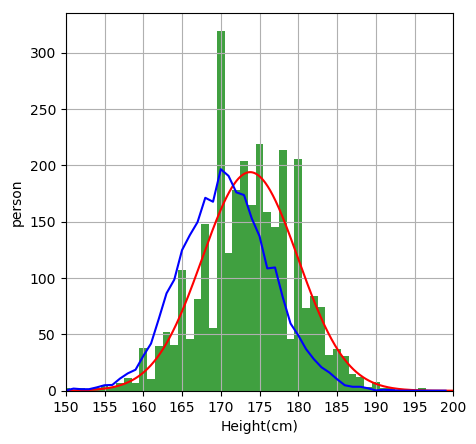

In [11]:
# グラフ描画用に身長と体重をリストに格納する 
heights = []; weight = []
for person in persons:
    # 身長記載が無い人は正規表現にマッチしない
    heights.append( int( person[ 'height' ] ) )   
    if person[ 'weight' ]:
        weight.append( int( person[ 'weight' ] ) )   
# 身長分布をヒストグラムとして描く
plt.figure( figsize=( 5, 5 ), dpi=100 )
fig, ax = plt.subplots( figsize=(5, 5), dpi=100 )
plt.ylabel( 'person'); plt.xlabel( 'Height(cm)' )
plt.xlim( [150,200] ) # 男性芸能人の場合
ax.hist( heights, bins=51, range=( 149.5, 200.5 ), 
            facecolor='green', alpha=0.75 )
ax.grid( True )
ax.set_xticks( np.linspace( 150, 200, 5+1 ), minor=True )
ax.set_xticks( np.linspace( 150, 200, 10+1 ), minor=False )

# 芸能人の身長分布に正規分布をフィッテイング
from scipy.stats import norm
from scipy.optimize import curve_fit

def func(x, a, mu, sigma):
    return a*np.exp( -(x-mu)**2 / ( 2*sigma**2 ) )

hist, bins = np.histogram(heights, 200-150, range=(150, 200))

bins = bins[:-1]
paramIni = [ 1, 170, 10 ]
popt, pcov = curve_fit( func, bins, hist, p0=paramIni )
print( popt[1] ) # 平均身長を出力
x = np.linspace(150, 200, 1000)
fitCurve = func( x, popt[0], popt[1], popt[2] )
plt.plot( x, fitCurve, 'r-' )

# 比較用に、日本人（17歳）の身長分布を読み込み、描く
toukei = np.loadtxt( '/Users/jun/Downloads/h26_hoken_toukei_02.csv', delimiter=',')
plt.plot( toukei[:,0], 2.7*toukei[:,1], 'b-' )

## 記事では省略する「体重表示」コード

64.51370330914648


<Figure size 500x500 with 0 Axes>

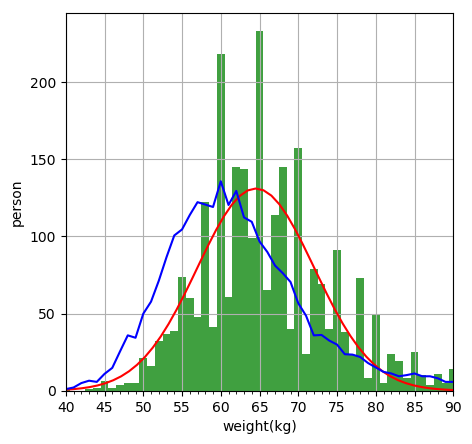

In [56]:
plt.figure(figsize=(5, 5), dpi=100)
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
plt.ylabel('person'); plt.xlabel('weight(kg)')
ax.hist( weight, 
            bins=51, range=(39.5, 90.5), 
        facecolor='green', alpha=0.75 )
        #facecolor='green', alpha=0.75, orientation="horizontal" )
plt.xlim( [40, 90] ) # 男性芸能人の場合
ax.grid(True)
ax.set_xticks(np.linspace(40, 90, 51), minor=True)
ax.set_xticks( np.linspace(40, 90, 11), minor=False)

hist, bins = np.histogram( weight, 90-40, range=( 40, 90 ) )
bins = bins[:-1]
paramIni = [1, 50, 10]
popt, pcov = curve_fit( func, bins, hist, p0=paramIni )
print( popt[1] ) 
x = np.linspace( 40, 90 )
fitCurve = func( x, popt[0], popt[1], popt[2] )
plt.plot( x, fitCurve, 'r-' )

# 比較用に、日本人（17歳）の体重分布を読み込み、描く
toukei = np.loadtxt( '/Users/jun/Downloads/h26_hoken_toukei_03.csv', delimiter=',')
plt.plot( toukei[:,0], 2.6*toukei[:,1], 'b-' )

# 女性芸能人

In [22]:
pdfFilePath2  = '/Users/jun/Downloads/women.pdf'
ppmFilePath2 = '/Users/jun/Downloads/pngimages2/'

In [ ]:
pdfFile2 = pdf2.PdfFileReader( pdfFilePath2 )
total_page2 = pdfFile2.getNumPages()

for page in range( 0, totalPage2-1, 10):
    pdf.convert_from_path(
        pdfFilePath2,
        output_folder = ppmFilePath2,
        dpi = 300,
        first_page = page,
        last_page = min( page +  10 , totalPage2 )
    )

In [ ]:
persons2 = []
for filePath in glob.glob( ppmFilePath2+'*.ppm' ):
    image  = cv.imread( filePath )
    for y_idx in range( 6 ):
        for x_idx in range( 2 ):
            y = int( 442.29 * y_idx + 317.62); x = 880 * x_idx + 400
            py = slice( y, y+130 ); px = slice( x, x+340 )
            txt = tool.image_to_string(
                Image.fromarray( image[ py, px ] ), lang="jpn",
                builder=pyocr.builders.TextBuilder(tesseract_layout=6)
            )
            matach = re.search( r"([0-9０-９]{4})年([0-9０-９]{1,2})月([0-9０-９]{1,2})日.+?([0-9０-９]{3})[\s]]*?([0-9０-９]*)", 
                          txt, re.MULTILINE | re.DOTALL )
            if m:
                persons2.append( {"height":matach.group(4), "weight":matach.group(5) } )

In [ ]:
with open('women.pickle', mode='wb') as f:
    pickle.dump( persons2, f)

In [23]:
with open( 'women.pickle', 'rb' ) as f:
    persons2 = pickle.load( f )

160.1539254833804


<Figure size 500x500 with 0 Axes>

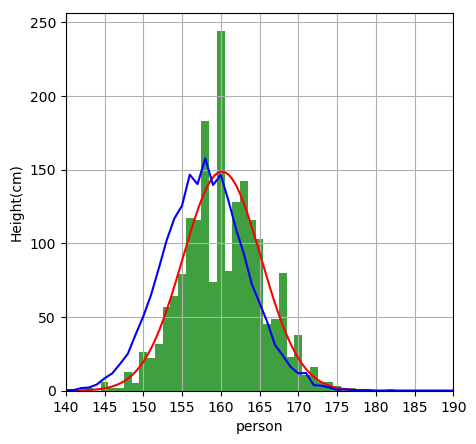

In [59]:
heights2 = []
weight2 = []
for person in persons2:
    heights2.append( int( person[ 'height' ] ) )   
    if person[ 'weight' ]:
        weight2.append( int( person[ 'weight' ] ) )   

plt.figure( figsize=(5, 5), dpi=100 )
fig, ax = plt.subplots( figsize=(5, 5), dpi=100 )
plt.xlabel( 'person' ); plt.ylabel( 'Height(cm)' )
plt.xlim( [140,190] )
        
ax.hist( heights2, bins=51, range=( 139.5, 190.5 ), 
        facecolor='green', alpha=0.75 )
ax.grid( True )
ax.set_xticks( np.linspace( 140, 190, 6 ), minor=True )
ax.set_xticks( np.linspace( 140, 190, 11 ), minor=False )

hist, bins = np.histogram( heights2, 190-140, range=(140, 190) )
bins = bins[:-1]
paramIni = [1, 150, 10]
popt, pcov = curve_fit( func, bins, hist, p0=paramIni )
print( popt[1] ) # 平均身長を出力
x = np.linspace(140, 190, 1000)
fitCurve = func( x, popt[0], popt[1], popt[2] )
plt.plot(x, fitCurve, 'r-')

toukei = np.loadtxt( '/Users/jun/Downloads/h26_hoken_toukei_02.csv', delimiter=',' )
plt.plot( toukei[:,0], 2*toukei[:,2], 'b-' )

47.13938060055718


<Figure size 500x500 with 0 Axes>

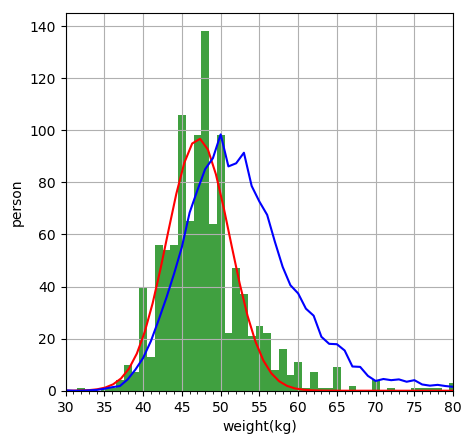

In [61]:
plt.figure( figsize=(5, 5), dpi=100 )
fig, ax = plt.subplots( figsize=(5, 5), dpi=100 )
plt.ylabel( 'person' ); plt.xlabel( 'weight(kg)' )
plt.xlim( [30,80] )

ax.hist( weight2, 
        bins=51, range=(29.5, 80.5), 
        facecolor='green', alpha=0.75 )
ax.grid( True )
ax.set_xticks( np.linspace(30, 80, 51), minor=True )
ax.set_xticks( np.linspace(30, 80, 11), minor=False )

hist, bins = np.histogram( weight2, 80-30, range=( 30, 80 ) )
bins = bins[:-1]
paramIni = [1, 50, 10]
popt, pcov = curve_fit( func, bins, hist, p0=paramIni )
print( popt[1] ) 
x = np.linspace( 30, 80 )
fitCurve = func( x, popt[0], popt[1], popt[2] )
plt.plot( x, fitCurve, 'r-' )

# 比較用に、日本人（17歳）の体重分布を読み込み、描く
toukei = np.loadtxt( '/Users/jun/Downloads/h26_hoken_toukei_03.csv', delimiter=',' )
plt.plot( toukei[:,0], 1.5*toukei[:,2], 'b-' )